# Loading and cleaning text data
## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.corpus import stopwords 
from nltk.stem import LancasterStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
#import spacy #for faster tokenization and lemmatization

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import re
import string

import project4_functions

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading the RecipeBox dataset


### allrecipes

In [2]:
#the three files are scraped from foodnetwork, epicurious, and allrecipes.com
#start with allrecipes.com - took 18.4s to load, can consider putting it into database?
rbdata_ar = pd.read_json(r'/Users/xinrucheng/Documents/GitHub/metisproject04/data/raw/recipes_raw/recipes_raw_nosource_ar.json')

In [3]:
rbdata_ar.head() #need to swap rows and columns
#features are title, ingredients, instructions, and picture_link(not needed?)

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves AD...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...","[1 cup butter, softened ADVERTISEMENT, 1 cup w...",[8 ounces whole wheat rotini pasta ADVERTISEME...,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...","[For potato crust: ADVERTISEMENT, 3 russet pot...","[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...",...,"[2 oranges, juiced ADVERTISEMENT, lemon, juice...","[3 cups rolled oats ADVERTISEMENT, 1 1/2 cups ...","[1 cup watercress, or as desired ADVERTISEMENT...","[2 pints heavy whipping cream ADVERTISEMENT, s...",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...","[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...","[3 tablespoons bacon grease ADVERTISEMENT, 2 c...","[4 egg yolks ADVERTISEMENT, 1 tablespoon white...","[1/4 cup canola oil ADVERTISEMENT, 3 cups quic..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [4]:
rb_ar=rbdata_ar.T #can just do pandas transpose, don't need to set orient parameter in read_json!
rb_ar.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [5]:
rb_ar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39802 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 4 columns):
title           39522 non-null object
ingredients     39522 non-null object
instructions    39522 non-null object
picture_link    39522 non-null object
dtypes: object(4)
memory usage: 2.8+ MB


In [6]:
#reset index because don't want the scraped link as index
rb_ar.index = range(len(rb_ar))
rb_ar.head() 

,title,ingredients,instructions,picture_link
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


### epicurious

In [7]:
rbdata_epi = pd.read_json(r'/Users/xinrucheng/Documents/GitHub/metisproject04/data/raw/recipes_raw/recipes_raw_nosource_epi.json')

In [8]:
rb_epi=rbdata_epi.T

In [9]:
rb_epi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25323 entries, 05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby to qznqHiNpq0AB1AYn002A2HvaEFnN0lq
Data columns (total 4 columns):
ingredients     25323 non-null object
picture_link    12119 non-null object
instructions    25323 non-null object
title           25323 non-null object
dtypes: object(4)
memory usage: 2.2+ MB


In [10]:
#only about half of the epicurious dataset has pictures, also this is the smallest dataset. 
#the columns are also in a different order
rb_epi.head()

,ingredients,picture_link,instructions,title
05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...",None,"Beat the egg whites until stiff, gradually add...",Christmas Eggnog
mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,"[18 fresh chestnuts, 2 1/2 pounds veal stew me...",None,Preheat oven to 400°F. Using small sharp knife...,"Veal, Carrot and Chestnut Ragoût"
oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,"[2 tablespoons unsalted butter, softened, 4 or...",3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,Preheat the oven to 350°F. Spread the softened...,Caramelized Bread Pudding with Chocolate and C...
Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,"[3/4 pound Stilton, crumbled (about 3 cups) an...",None,"In a food processor blend the Stilton, the cre...",Sherried Stilton and Green Peppercorn Spread
bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,"[2 cups (about 9 1/2 ounces) whole almonds, to...",None,Position rack in center of oven and preheat to...,Almond-Chocolate Macaroons


### foodnetwork

In [11]:
rbdata_fn = pd.read_json(r'/Users/xinrucheng/Documents/GitHub/metisproject04/data/raw/recipes_raw/recipes_raw_nosource_fn.json')

In [12]:
rb_fn=rbdata_fn.T

In [13]:
rb_fn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60039 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
instructions    59628 non-null object
ingredients     59802 non-null object
title           59750 non-null object
picture_link    30952 non-null object
dtypes: object(4)
memory usage: 4.8+ MB


This is the largest single-source dataset with 60039 entries, but it has many missing values. 
What could cause the most issues for out purposes is missing title and ingredients. It would make sense to drop the rows that do not have title or ingredients, and even the ones missing instructions. We won't likely need the picture link, so we can drop those columns for all three files in the recipebox dataset.

In [14]:
rb_fn.head()

,instructions,ingredients,title,picture_link
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Toss ingredients lightly and spoon into a butt...,"[1/2 cup celery, finely chopped, 1 small green...",Grammie Hamblet's Deviled Crab,None
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Watch how to make this recipe.\nSprinkle the s...,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Infineon Raceway Baked Beans,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,"In a large saucepan, let the beans soak in eno...","[1 1/2 cups dried black beans, picked over and...",Southwestern Black Bean Dip,None
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Watch how to make this recipe.\nPreheat the ov...,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Sour Cream Noodle Bake,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Special equipment: sushi mat\nCook the brown r...,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Sushi Renovation,None


## Data cleaning

### drop nulls from recipebox - fn and ar

1. Clean allrecipes data

In [15]:
ardf=rb_ar.loc[:,['title','ingredients','instructions']] #drop picture_link column
ardf.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


In [16]:
ardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39802 entries, 0 to 39801
Data columns (total 3 columns):
title           39522 non-null object
ingredients     39522 non-null object
instructions    39522 non-null object
dtypes: object(3)
memory usage: 933.0+ KB


In [17]:
#still has ~300 null rows? drop those also
ardf=ardf.dropna(how='any')
ardf

#Now have 39522 observations (recipes) with no null values

#*still need to get rid of link as well as punctuations before further processing

#also the word ADVERTISEMENT shows up a lot - filter it out

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...
...,...,...,...
39797,Thai-Indian Veggie Soup,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...",Heat oil in a large pot over medium heat. Add ...
39798,Coconut Milk-Free Panang Curry Chicken,"[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...",Heat cream and coconut extract in a skillet or...
39799,Cooked Cold Salad,"[3 tablespoons bacon grease ADVERTISEMENT, 2 c...",Heat bacon grease in a skillet over medium-hig...
39800,Easy Eggnog Creme Brulee,"[4 egg yolks ADVERTISEMENT, 1 tablespoon white...",Preheat oven to 350 degrees F (175 degrees C)....


2. clean epicurious data

No missing values in other features, just drop picture_link column


In [18]:
epidf=rb_epi.loc[:,['title','ingredients','instructions']] #drop picture_link column
epidf.head()

,title,ingredients,instructions
05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,Christmas Eggnog,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...","Beat the egg whites until stiff, gradually add..."
mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,"Veal, Carrot and Chestnut Ragoût","[18 fresh chestnuts, 2 1/2 pounds veal stew me...",Preheat oven to 400°F. Using small sharp knife...
oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Caramelized Bread Pudding with Chocolate and C...,"[2 tablespoons unsalted butter, softened, 4 or...",Preheat the oven to 350°F. Spread the softened...
Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,Sherried Stilton and Green Peppercorn Spread,"[3/4 pound Stilton, crumbled (about 3 cups) an...","In a food processor blend the Stilton, the cre..."
bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,Almond-Chocolate Macaroons,"[2 cups (about 9 1/2 ounces) whole almonds, to...",Position rack in center of oven and preheat to...


In [19]:
epidf.info() #no nulls

<class 'pandas.core.frame.DataFrame'>
Index: 25323 entries, 05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby to qznqHiNpq0AB1AYn002A2HvaEFnN0lq
Data columns (total 3 columns):
title           25323 non-null object
ingredients     25323 non-null object
instructions    25323 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


3. clean food network data

drop picture_link column as well as nulls

In [20]:
fndf=rb_fn.loc[:,['title','ingredients','instructions']] #drop picture_link column
fndf.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,"[1/2 cup celery, finely chopped, 1 small green...",Toss ingredients lightly and spoon into a butt...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Watch how to make this recipe.\nSprinkle the s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,"[1 1/2 cups dried black beans, picked over and...","In a large saucepan, let the beans soak in eno..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Watch how to make this recipe.\nPreheat the ov...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Special equipment: sushi mat\nCook the brown r...


In [21]:
fndf.info() #check for nulls

<class 'pandas.core.frame.DataFrame'>
Index: 60039 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 3 columns):
title           59750 non-null object
ingredients     59802 non-null object
instructions    59628 non-null object
dtypes: object(3)
memory usage: 4.3+ MB


In [22]:
fndf=fndf.dropna(how='any') #drop nulls


In [23]:
#merge recipe box data; can use same code for cleaning text (regex, etc)

### Merge Recipe box datasets (allrecipes, foodnetwork, epicurious)

In [24]:
frames = [ardf, fndf, epidf]
data = pd.concat(frames)
data.tail()

,title,ingredients,instructions
lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK,Spinach and Lentil Soup,"[5 cups (about) canned beef broth, 1 cup lenti...",Bring 4 cups broth and lentils to boil in larg...
EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC,Fresh Cheese with Spinach,"[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...","Stir together turmeric, 1 1/2 cups water, and ..."
aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe,Jalapeño and Lime–Marinated Skirt Steak Tacos,"[1 medium jalapeño, thinly sliced, 2 garlic cl...","Marinate and cook the steak: Combine jalapeño,..."
fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe,Semolina–Lemon Syrup Cakes,"[1 1/2 cups almond flour or almond meal, 1/2 c...",Make the cakes: Preheat oven to 350°F. Line th...
qznqHiNpq0AB1AYn002A2HvaEFnN0lq,Chicken Cacciatore,"[1 1/2 pounds plum tomatoes, coarsely chopped ...","Preheat oven to 400°F. Combine plum tomatoes, ..."


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124473 entries, 0 to qznqHiNpq0AB1AYn002A2HvaEFnN0lq
Data columns (total 3 columns):
title           124473 non-null object
ingredients     124473 non-null object
instructions    124473 non-null object
dtypes: object(3)
memory usage: 3.8+ MB


### Reset index

In [26]:
data.index = range(len(data))
data.head() 

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


### Remove digits

In [27]:
data_ingr=data['ingredients'].apply(project4_functions.regex_nodigits_new)
data_ingr

0         [' skinless, boneless chicken breast halves AD...
1         [' (. ounce) cans condensed cream of mushroom ...
2         ['/ cup packed brown sugar ADVERTISEMENT', '/ ...
3         [' cup butter, softened ADVERTISEMENT', ' cup ...
4         [' ounces whole wheat rotini pasta ADVERTISEME...
                                ...                        
124468    [' cups (about) canned beef broth', ' cup lent...
124469    ['/ teaspoon turmeric', ' cups water', '/ poun...
124470    [' medium jalapeño, thinly sliced', ' garlic c...
124471    [' / cups almond flour or almond meal', '/ cup...
124472    [' / pounds plum tomatoes, coarsely chopped (s...
Name: ingredients, Length: 124473, dtype: object

## Vectorization

### Custom stopwords

In [28]:
set(stopwords.words('english')) #look at the nltk English stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
stopwords_nltk = stopwords.words('english')

In [30]:
len(stopwords_nltk)

179

In [31]:
stopwords_nltk.extend(['ADVERTISEMENT', 'advertisement']) #when run cell again, keeps getting extended
print(len(stopwords_nltk))

181


In [32]:
stopwords_nltk

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
#added advertisement to stopwords, next step is to remove numbers from data before Vectorization
#CountVectorizer removes punctuation and only keeps alphanumeric
#vectorizers and nltk tokenizer have options to set tokens with regex, or to remove stopwords

### Vectorize - Count Vectorizer

In [34]:
#countVectorizer 
#Converts a collection of text documents to a matrix of token counts
#input is expected to be the sequence strings or bytes items are expected to be analyzed directly.

In [35]:
#only work with merged ingredients dataset (from all 3 sources) for now
corpus = data_ingr
ct_vectorizer = CountVectorizer(stop_words=stopwords_nltk)

ingr_ct = ct_vectorizer.fit_transform(corpus)
print(ct_vectorizer.get_feature_names())

['_about', '_gravié_ra', '_hoong', 'aa', 'aalborg', 'aale', 'aaron', 'aarons', 'aarti', 'aattachment', 'ab', 'abalone', 'abasco', 'abbaye', 'abita', 'able', 'abondance', 'aborio', 'aborrio', 'abruzzese', 'abruzzo', 'absente', 'absinth', 'absinthe', 'absolut', 'absolute', 'absolutely', 'absorb', 'abuelita', 'abura', 'aburaage', 'aburage', 'abut', 'ac', 'acacia', 'acado', 'acai', 'accent', 'accents', 'acceptable', 'accepted', 'access', 'accommodate', 'accompanied', 'accompaniment', 'accompaniments', 'accompany', 'accompanying', 'accordian', 'according', 'accordingly', 'accordion', 'accuracy', 'accurately', 'acerola', 'acetate', 'aceto', 'achieve', 'achilleos', 'achiote', 'achoite', 'acholado', 'acid', 'acidic', 'acidity', 'acidophilus', 'acids', 'acidulated', 'acini', 'acitron', 'ackee', 'ackees', 'acommpaniment', 'acorn', 'acorns', 'acquello', 'across', 'acrylic', 'act', 'acting', 'activa', 'activate', 'activated', 'active', 'activedry', 'acto', 'acts', 'actually', 'adam', 'adams', 'add

### Vectorize - TF-IDF
might work better, because want to choose words "unique" to this document

TF-IDF = (Term Frequency) * (Inverse Document Frequency)

(how often word occurs in this doc) * inverse of (how often this word occurs in all documents)

In [36]:
tf_vectorizer = TfidfVectorizer(stop_words=stopwords_nltk)
ingr_tfidf = tf_vectorizer.fit_transform(corpus)

print(tf_vectorizer.get_feature_names())

['_about', '_gravié_ra', '_hoong', 'aa', 'aalborg', 'aale', 'aaron', 'aarons', 'aarti', 'aattachment', 'ab', 'abalone', 'abasco', 'abbaye', 'abita', 'able', 'abondance', 'aborio', 'aborrio', 'abruzzese', 'abruzzo', 'absente', 'absinth', 'absinthe', 'absolut', 'absolute', 'absolutely', 'absorb', 'abuelita', 'abura', 'aburaage', 'aburage', 'abut', 'ac', 'acacia', 'acado', 'acai', 'accent', 'accents', 'acceptable', 'accepted', 'access', 'accommodate', 'accompanied', 'accompaniment', 'accompaniments', 'accompany', 'accompanying', 'accordian', 'according', 'accordingly', 'accordion', 'accuracy', 'accurately', 'acerola', 'acetate', 'aceto', 'achieve', 'achilleos', 'achiote', 'achoite', 'acholado', 'acid', 'acidic', 'acidity', 'acidophilus', 'acids', 'acidulated', 'acini', 'acitron', 'ackee', 'ackees', 'acommpaniment', 'acorn', 'acorns', 'acquello', 'across', 'acrylic', 'act', 'acting', 'activa', 'activate', 'activated', 'active', 'activedry', 'acto', 'acts', 'actually', 'adam', 'adams', 'add

# Dimensionality Reduction

## Recipe Box (120k dataset)

* CV+LSA
* CV+NMF
* TFIDF+LSA
* TFIDF+NMF
* LDA?

### Count Vectorized LSA, RB data

In [37]:
#dim reduction (LSA) on rb data, ingredients column only:
#corpus = data_ingr  in 1.4.2
#ct_vectorizer = CountVectorizer(stop_words=stopwords_nltk)
#ingr_ct = ct_vectorizer.fit_transform(corpus)

lsa_10 = TruncatedSVD(10)  
rb_lsa_10 = lsa_10.fit_transform(ingr_ct)
lsa_10.explained_variance_ratio_

array([0.0984525 , 0.06934334, 0.04334735, 0.03047436, 0.02522854,
       0.02132169, 0.01917143, 0.01757763, 0.01656094, 0.01563352])

In [38]:
project4_functions.display_topics(lsa_10, ct_vectorizer.get_feature_names(), 10) 


Topic  0
cup, teaspoon, tablespoons, chopped, cups, salt, pepper, ground, fresh, tablespoon

Topic  1
chopped, pepper, fresh, tablespoons, oil, olive, garlic, black, freshly, tablespoon

Topic  2
teaspoon, ground, salt, powder, teaspoons, sugar, cups, tablespoons, baking, flour

Topic  3
tablespoons, cups, sugar, butter, ounces, unsalted, flour, large, cut, cream

Topic  4
chopped, cups, ounce, ounces, finely, cream, cheese, package, teaspoon, onion

Topic  5
cups, ounce, pepper, sliced, ounces, salt, cut, black, cheese, ground

Topic  6
ounce, tablespoons, package, cheese, ounces, cream, sauce, drained, taste, shredded

Topic  7
fresh, cut, inch, teaspoon, ounces, sliced, juice, peeled, ounce, pieces

Topic  8
tablespoon, sauce, cups, minced, sugar, powder, juice, teaspoons, fresh, water

Topic  9
ounces, tablespoon, freshly, ground, butter, salt, kosher, cream, finely, unsalted


CtVectorizer purely based on counts, quantities (teaspoons) show up the most! TF-IDF might make more sense. Also could add more stopwords

### TF-IDF, LSA

In [39]:
#TF-IDF from 1.4.3 above:
#vectorizer = TfidfVectorizer(stop_words=stopwords_nltk)
#ingr_tfidf = vectorizer.fit_transform(corpus)

#lsa_10 = TruncatedSVD(10)  
tf_lsa_10 = lsa_10.fit_transform(ingr_tfidf)
lsa_10.explained_variance_ratio_

array([0.01240815, 0.02918212, 0.01236635, 0.01123294, 0.00862915,
       0.00830879, 0.00799162, 0.00739011, 0.00690298, 0.00684927])

In [40]:
project4_functions.display_topics(lsa_10, tf_vectorizer.get_feature_names(), 10)


Topic  0
cup, teaspoon, tablespoons, chopped, cups, ground, salt, tablespoon, pepper, sugar

Topic  1
sugar, cup, vanilla, baking, extract, flour, teaspoon, cups, purpose, butter

Topic  2
ounce, package, cheese, cream, cup, shredded, ounces, drained, mix, chocolate

Topic  3
teaspoon, ground, ounce, powder, pepper, taste, dried, onion, diced, package

Topic  4
cup, chopped, juice, fresh, white, lime, water, sugar, tablespoon, orange

Topic  5
juice, ounce, lemon, teaspoon, tablespoon, orange, sauce, lime, tablespoons, ounces

Topic  6
cut, inch, sliced, cups, pieces, sauce, peeled, chicken, water, thinly

Topic  7
cup, cheese, parmesan, sliced, freshly, grated, vinegar, oil, shredded, olive

Topic  8
tablespoons, cups, teaspoons, tablespoon, flour, purpose, minced, water, sauce, lemon

Topic  9
tablespoons, sauce, tablespoon, chocolate, chopped, cream, ounces, butter, finely, unsalted


In [41]:
#still get lots of tablespoons and cups, need more cleaning
#put them into stopwords? table/teaspoons, cups, ounces
#OR: do stemming before tokenization? phrase tagging/lemmatization? only keep nouns of ingr names

### Count Vectorized NMF, RB data

In [42]:
nmf_10 = NMF(10) 
rb_nmf_10 = nmf_10.fit_transform(ingr_ct) 

In [43]:
project4_functions.display_topics(nmf_10, ct_vectorizer.get_feature_names(), 10)


Topic  0
cup, sugar, butter, white, flour, cream, water, juice, milk, cheese

Topic  1
tablespoons, butter, sauce, unsalted, plus, oil, juice, lemon, salt, fresh

Topic  2
teaspoon, ground, powder, salt, dried, cinnamon, teaspoons, baking, sugar, flour

Topic  3
cups, sugar, butter, flour, vanilla, teaspoons, purpose, extract, salt, baking

Topic  4
chopped, fresh, finely, cups, onion, garlic, parsley, leaves, coarsely, cloves

Topic  5
pepper, ground, salt, black, freshly, oil, olive, kosher, garlic, red

Topic  6
ounce, package, cheese, drained, diced, cream, taste, shredded, onion, beans

Topic  7
cut, fresh, inch, sliced, peeled, large, oil, pound, pieces, thinly

Topic  8
tablespoon, sauce, minced, oil, garlic, fresh, juice, vinegar, soy, lemon

Topic  9
ounces, cheese, cream, chocolate, butter, grated, unsalted, heavy, plus, sliced


In [44]:
#these nmf topics seem to make more sense

### TF-IDF, NMF, RB data


In [45]:
nmf_10 = NMF(10) 
rbtf_nmf_10 = nmf_10.fit_transform(ingr_tfidf)  #using tfidf results from 2.3.4

In [46]:
project4_functions.display_topics(nmf_10, tf_vectorizer.get_feature_names(), 10)


Topic  0
chopped, finely, diced, fresh, onion, cups, green, red, bell, parsley

Topic  1
teaspoon, ground, cinnamon, dried, salt, powder, pepper, black, nutmeg, cumin

Topic  2
ounce, package, cheese, shredded, drained, cream, mix, frozen, cheddar, cans

Topic  3
tablespoon, sauce, tablespoons, minced, taste, garlic, oil, soy, pepper, vinegar

Topic  4
freshly, olive, oil, pepper, black, extra, kosher, virgin, salt, ground

Topic  5
juice, lemon, fresh, orange, lime, zest, tablespoons, ice, garnish, mint

Topic  6
cut, inch, pieces, sliced, peeled, slices, thick, large, thinly, pound

Topic  7
cup, sugar, white, brown, water, packed, butter, milk, egg, coconut

Topic  8
cups, baking, flour, purpose, teaspoons, sugar, powder, eggs, soda, extract

Topic  9
cream, chocolate, vanilla, sugar, extract, ounces, unsalted, butter, tablespoons, room


In [47]:

#**tune TF-IDF parameters? look into docs
#**also: GridSearchCV to find how many topics/ks to use?? sklearn doc example


## Further preprocessing to get more meaningful topics

### Add more stopwords before dim reduction
-- lemmatize first? before vectorizer (still in word space)

In [48]:
stopwords_ingr = stopwords_nltk #build upon previous custom stopwords (2.1) which included ADVERTISEMENT
stopwords_ingr.extend(['tablespoon', 'teaspoon', 'cup', 'ounce', 'pound', 'tablespoons', 'teaspoons', 'cups', 'ounces', 'pounds','inch','inches']) 
print(len(stopwords_ingr))#when run cell again, keeps getting extended

193


### Count Vectorized LSA, new stopwords

In [49]:
corpus = data_ingr
ct_vec = CountVectorizer(stop_words=stopwords_ingr)

ingr_ct = ct_vec.fit_transform(corpus)
print(ct_vec.get_feature_names())

['_about', '_gravié_ra', '_hoong', 'aa', 'aalborg', 'aale', 'aaron', 'aarons', 'aarti', 'aattachment', 'ab', 'abalone', 'abasco', 'abbaye', 'abita', 'able', 'abondance', 'aborio', 'aborrio', 'abruzzese', 'abruzzo', 'absente', 'absinth', 'absinthe', 'absolut', 'absolute', 'absolutely', 'absorb', 'abuelita', 'abura', 'aburaage', 'aburage', 'abut', 'ac', 'acacia', 'acado', 'acai', 'accent', 'accents', 'acceptable', 'accepted', 'access', 'accommodate', 'accompanied', 'accompaniment', 'accompaniments', 'accompany', 'accompanying', 'accordian', 'according', 'accordingly', 'accordion', 'accuracy', 'accurately', 'acerola', 'acetate', 'aceto', 'achieve', 'achilleos', 'achiote', 'achoite', 'acholado', 'acid', 'acidic', 'acidity', 'acidophilus', 'acids', 'acidulated', 'acini', 'acitron', 'ackee', 'ackees', 'acommpaniment', 'acorn', 'acorns', 'acquello', 'across', 'acrylic', 'act', 'acting', 'activa', 'activate', 'activated', 'active', 'activedry', 'acto', 'acts', 'actually', 'adam', 'adams', 'add

In [50]:
#previously, dim reduction, 10 topics:
#lsa_10 = TruncatedSVD(10)  
#ct_lsa_10 = lsa_10.fit_transform(ingr_ct)
ct_lsa_10 = lsa_10.fit_transform(ingr_ct)
lsa_10.explained_variance_ratio_

array([0.077878  , 0.04956886, 0.03222251, 0.02394615, 0.01875342,
       0.01574703, 0.01458098, 0.01400139, 0.01375487, 0.01199452])

In [51]:
project4_functions.display_topics(lsa_10, ct_vec.get_feature_names(), 20) 


Topic  0
chopped, salt, pepper, fresh, ground, oil, black, garlic, olive, freshly, sliced, large, red, finely, sugar, cut, butter, onion, leaves, minced

Topic  1
sugar, butter, flour, vanilla, purpose, extract, baking, cream, unsalted, powder, salt, eggs, egg, milk, chocolate, large, white, brown, temperature, room

Topic  2
ground, pepper, black, salt, freshly, oil, kosher, sliced, olive, minced, diced, vinegar, red, garlic, sauce, thinly, cut, taste, extra, virgin

Topic  3
fresh, sliced, cut, juice, lemon, oil, thinly, leaves, olive, large, peeled, minced, extra, virgin, pieces, plus, lime, sugar, halved, orange

Topic  4
fresh, ground, freshly, lemon, juice, kosher, black, leaves, finely, grated, salt, parsley, extra, plus, zest, virgin, cinnamon, olive, orange, unsalted

Topic  5
fresh, ground, sauce, juice, sugar, minced, diced, sliced, lime, ginger, taste, onion, green, cinnamon, white, cilantro, water, brown, soy, powder

Topic  6
cut, large, peeled, pieces, ground, butter, u

### TF-IDF, LSA, with new stopwords

In [52]:
tf_vec = TfidfVectorizer(stop_words=stopwords_ingr)
ingr_tfidf = tf_vec.fit_transform(corpus)

print(tf_vec.get_feature_names())

['_about', '_gravié_ra', '_hoong', 'aa', 'aalborg', 'aale', 'aaron', 'aarons', 'aarti', 'aattachment', 'ab', 'abalone', 'abasco', 'abbaye', 'abita', 'able', 'abondance', 'aborio', 'aborrio', 'abruzzese', 'abruzzo', 'absente', 'absinth', 'absinthe', 'absolut', 'absolute', 'absolutely', 'absorb', 'abuelita', 'abura', 'aburaage', 'aburage', 'abut', 'ac', 'acacia', 'acado', 'acai', 'accent', 'accents', 'acceptable', 'accepted', 'access', 'accommodate', 'accompanied', 'accompaniment', 'accompaniments', 'accompany', 'accompanying', 'accordian', 'according', 'accordingly', 'accordion', 'accuracy', 'accurately', 'acerola', 'acetate', 'aceto', 'achieve', 'achilleos', 'achiote', 'achoite', 'acholado', 'acid', 'acidic', 'acidity', 'acidophilus', 'acids', 'acidulated', 'acini', 'acitron', 'ackee', 'ackees', 'acommpaniment', 'acorn', 'acorns', 'acquello', 'across', 'acrylic', 'act', 'acting', 'activa', 'activate', 'activated', 'active', 'activedry', 'acto', 'acts', 'actually', 'adam', 'adams', 'add

In [53]:
#lsa_10 = TruncatedSVD(10)  
tf_lsa_10 = lsa_10.fit_transform(ingr_tfidf)

In [54]:
project4_functions.display_topics(lsa_10, tf_vec.get_feature_names(), 20) 


Topic  0
chopped, ground, pepper, salt, fresh, oil, sugar, butter, black, garlic, olive, white, sliced, large, freshly, flour, minced, finely, onion, red

Topic  1
sugar, vanilla, baking, extract, flour, purpose, butter, eggs, milk, powder, chocolate, egg, soda, cream, white, unsalted, cinnamon, brown, softened, confectioners

Topic  2
fresh, lemon, juice, orange, leaves, plus, extra, zest, virgin, lime, olive, sugar, unsalted, kosher, large, finely, cut, garnish, mint, freshly

Topic  3
ground, baking, powder, salt, flour, freshly, black, purpose, oil, pepper, kosher, cinnamon, soda, olive, vinegar, brown, vegetable, virgin, extra, cloves

Topic  4
cheese, freshly, grated, parmesan, kosher, unsalted, extra, butter, olive, virgin, plus, black, room, temperature, cream, large, salt, bread, slices, shredded

Topic  5
chopped, finely, baking, fresh, parsley, chocolate, purpose, flour, soda, leaves, coarsely, extract, tomatoes, walnuts, powder, semisweet, chips, olive, eggs, leaf

Topic  

### Count Vectorized NMF, new stopwords

In [55]:
nmf_10 = NMF(10) 
rb_nmf_10 = nmf_10.fit_transform(ingr_ct) 

In [56]:
project4_functions.display_topics(nmf_10, ct_vectorizer.get_feature_names(), 20)


Topic  0
peppa, salmonella, freshest, black, korn, butter, gros, reata, follow, grasshoppers, musselman, leave, unpitted, fine, plumpjack, flounder, pimms, threadfin, garland, canola

Topic  1
sucuk, butter, flounder, vali, salmonella, purging, cream, extra, baking, unpitted, eggplants, efficient, pourable, mildest, whip, lardo, chocolate, plumpjack, tein, rondele

Topic  2
chopped, fine, ondine, coarsely, garland, parmigiano, chicken, cloves, celery, lardo, whip, greece, tollhouse, fresca, media, pectoral, broth, ones, dragées, cilantro

Topic  3
fresca, jug, leicester, leave, lily, milman, grasshoppers, parmigiano, sprays, optionally, minneolas, garning, threadfin, zatarains, cilantro, basil, fine, plumpjack, pectoral, rosato

Topic  4
sativa, milman, garland, ohnuts, whip, cloves, sous, wasabi, ribera, chicken, vecchio, tartlett, village, pourable, dreyer, ginersnaps, peppa, serve, ondine, salmonella

Topic  5
gros, cinnamon, cumin, cloves, nuoc, pourable, beef, black, dreyer, gine

In [57]:
#nmf has some unusal words when using count-vectorized data (brand names?)

In [58]:
nmf_5 = NMF(5) 
rb_nmf_5 = nmf_5.fit_transform(ingr_ct) 

In [59]:
project4_functions.display_topics(nmf_5, ct_vectorizer.get_feature_names(), 20)


Topic  0
gros, peppa, salmonella, black, freshest, ohnuts, korn, garland, diavolo, olek, tartlett, pourable, ondine, milman, cloves, sativa, grasshoppers, cheese, cumin, reata

Topic  1
sucuk, butter, flounder, salmonella, vali, purging, cream, extra, baking, unpitted, pourable, lardo, eggplants, efficient, mildest, whip, chocolate, brown, plumpjack, wasabi

Topic  2
chopped, fine, ondine, garland, chicken, greece, coarsely, peppa, cloves, parmigiano, tollhouse, reconstitituted, celery, lardo, dragées, whip, dreyer, cheese, pectoral, media

Topic  3
fresca, jug, leicester, leave, milman, ohnuts, olek, grasshoppers, lily, parmigiano, salmonella, extinct, plumpjack, sprays, vineyard, freshest, threadfin, garning, optionally, fine

Topic  4
slathering, ohnuts, cusp, reconstitituted, olek, thickness, lardo, peppa, garland, pectoral, salmonella, sativa, whip, village, ondine, pict, slow, milman, william, chicken


### TF-IDF, NMF, new stopwords


In [60]:
nmf_10 = NMF(10) 
rbtf_nmf_10 = nmf_10.fit_transform(ingr_tfidf) 

In [61]:
project4_functions.display_topics(nmf_10, tf_vectorizer.get_feature_names(), 20)


Topic  0
diavolo, tartlett, peppa, ondine, bell, reconstitituted, tollhouse, milman, greece, beans, dragées, dreyer, garland, salmonella, secure, peppermints, cans, toll, black, corn

Topic  1
vali, sucuk, extra, chocolate, cream, butter, unpitted, rondele, tein, heavier, efficient, mildest, lardo, confectioners, semicircles, chips, unsmoked, puppy, granualted, plumpjack

Topic  2
jug, leicester, fresca, optionally, lily, zatarains, sucuk, iberian, garning, wasabi, grasshoppers, minneolas, pinapples, fluffed, pectin, frothy, squared, cubes, chilled, vital

Topic  3
cheese, shovel, paccheri, cream, cheddar, grasshoppers, parlour, frothy, misting, soul, bread, slaw, mildest, textured, mouton, sodium, souchong, dragées, eggplants, condensed

Topic  4
gros, black, freshest, peppa, salmonella, korn, cinnamon, nuoc, pimms, cumin, cayenne, pappadams, musselman, beef, allspice, cloves, butter, coriander, popsticks, pot

Topic  5
chopped, fine, fresca, parmigiano, ondine, coarsely, celery, lea

NMF has some unusal words, including words from other languages. Overall the NMF topics are nonsensical regardless of the number of topics. Choosing LSA for recommendations going forward.

# Find similar recipes within dataset
## Cosine Similarity

> cosine sim: from cos sim docs: input X, Y

> X : ndarray or sparse array, shape: (n_samples_X, n_features) Input data.

> Y : ndarray or sparse array, shape: (n_samples_Y, n_features) Input data. If None, the output will be the pairwise similarities between all samples in X. 

(previously running slowly because doing pairwise calculation between all documents in X; instead, want one vs. all)

**Find the recipes with the highest cosine similarity to a few recipes, compare recommendations between ct-v data and tf-idf vectorized data.**

### Count-Vectorized LSA

#### Recipes similar to cookies

In [62]:
data.iloc[3] #first we choose this recipe for recommendations

title                                 Best Chocolate Chip Cookies
ingredients     [1 cup butter, softened ADVERTISEMENT, 1 cup w...
instructions    Preheat oven to 350 degrees F (175 degrees C)....
Name: 3, dtype: object

In [63]:
data_ingr[3] #ingredient list, before vectorizing and filtering out stopwords

"[' cup butter, softened ADVERTISEMENT', ' cup white sugar ADVERTISEMENT', ' cup packed brown sugar ADVERTISEMENT', ' eggs ADVERTISEMENT', ' teaspoons vanilla extract ADVERTISEMENT', ' cups all-purpose flour ADVERTISEMENT', ' teaspoon baking soda ADVERTISEMENT', ' teaspoons hot water ADVERTISEMENT', '/ teaspoon salt ADVERTISEMENT', ' cups semisweet chocolate chips ADVERTISEMENT', ' cup chopped walnuts ADVERTISEMENT', 'ADVERTISEMENT']"

Find the cosine similarity between this recipe and the rest of the dimensionally-reduced (via LSA) dataset:

In [64]:
#lsa_10 = TruncatedSVD(10)  
#ct_lsa_10 = lsa_10.fit_transform(ingr_ct)
lsa_s_choc_ctv=cosine_similarity(ct_lsa_10[3].reshape(1, -1), ct_lsa_10).round(3) 
lsa_s_choc_ctv

array([[0.274, 0.356, 0.405, ..., 0.175, 0.61 , 0.174]])

In [65]:
#argsort returns sorted array pf indices with their values from low to high 
lsa_s_choc_ctv.argsort()

array([[80276, 98585, 63735, ...,  5450, 35999,     3]])

In [66]:
a = lsa_s_choc_ctv.argsort()
np.fliplr(a) #flip array sorted by argsort, slower though

#expect the first result to be the recipe itself [3], with cosine similarity=1

array([[    3, 35999,  5450, ..., 63735, 98585, 80276]])

In [67]:
#reverse array (-lsa_s) - sometimes order changes when flipped this way?
#(-(lsa_s_choc)).argsort() 

In [68]:
#look at the other recipes, see if the recommendation makes sense
data.iloc[2218]

title                  White Chocolate Macadamia Cranberry Dreams
ingredients     [3 cups all-purpose flour ADVERTISEMENT, 3/4 t...
instructions    In a medium bowl set aside flour, baking soda ...
Name: 2218, dtype: object

In [69]:
data_ingr[2218]

"[' cups all-purpose flour ADVERTISEMENT', '/ teaspoon baking soda ADVERTISEMENT', '/ teaspoon salt ADVERTISEMENT', '/ cup white sugar ADVERTISEMENT', ' cup packed light brown sugar ADVERTISEMENT', ' cup butter, softened ADVERTISEMENT', ' eggs ADVERTISEMENT', ' tablespoon vanilla extract ADVERTISEMENT', ' cup vanilla baking chips ADVERTISEMENT', ' cup chopped macadamia nuts ADVERTISEMENT', ' cup dried cranberries ADVERTISEMENT', 'ADVERTISEMENT']"

In [70]:
data.iloc[5450]

title                              Wilderness Place Lodge Cookies
ingredients     [2 cups butter ADVERTISEMENT, 2 cups white sug...
instructions    Preheat the oven to 350 degrees F (175 degrees...
Name: 5450, dtype: object

In [71]:
data_ingr[5450]

"[' cups butter ADVERTISEMENT', ' cups white sugar ADVERTISEMENT', ' cups packed brown sugar ADVERTISEMENT', ' eggs ADVERTISEMENT', ' teaspoons vanilla extract ADVERTISEMENT', ' cups all-purpose flour ADVERTISEMENT', ' teaspoons salt ADVERTISEMENT', ' teaspoons baking soda ADVERTISEMENT', ' cups quick cooking oats ADVERTISEMENT', ' cups chocolate chips ADVERTISEMENT', ' cups chopped and toasted walnuts ADVERTISEMENT', ' cup coconut ADVERTISEMENT', ' cup raisins ADVERTISEMENT', 'ADVERTISEMENT']"

Yay! It worked! The two recipes most similar to Best Chocolate Chip Cookies are also cookies with chocolate

In [72]:
#quickly look at the most and least similar recipes
rev_a = np.fliplr(a)

In [73]:
data.iloc[rev_a[0]]

,title,ingredients,instructions
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
35999,Edible Chocolate Chip Cookie Dough,"[1 cup butter, softened ADVERTISEMENT, 1/4 cup...","Mix butter, milk, and vanilla extract together..."
5450,Wilderness Place Lodge Cookies,"[2 cups butter ADVERTISEMENT, 2 cups white sug...",Preheat the oven to 350 degrees F (175 degrees...
32740,Peanut Cookies II,"[1/3 cup shortening ADVERTISEMENT, 1/4 cup pea...",Preheat oven to 375 degrees F (190 degrees C)....
16752,Evil Cookies,[2/3 cup butter flavored shortening ADVERTISEM...,"Cream together shortening and sugars, blend in..."
...,...,...,...
95659,Martini Thyme,"[3 ounces gin, 3/4-ounce Chartreuse, Thyme sprig]","Add gin and Chartreuse to cocktail shaker, sti..."
116361,Frizzled Black Forest Ham,[16 very thin slices Black Forest ham (8 oz)],Sauté ham in batches without crowding in a lar...
63735,Figs Wrapped in Smoked Cured Ham,"[8 perfectly ripe black figs, washed and stems...",Carefully cut each fig almost in half lengthwi...
98585,Everything Pretzels,[Photograph by Victor Schrager],Sprinkle 2 tablespoons grated sharp cheddar ch...


I'm a bit surprised by the least-similar recipe (as I like both cookies and pretzels, and they are not that different to make). This is likely due to it having missing ingredients.

#### Pot roast

In [74]:
data.iloc[1]

title                               Awesome Slow Cooker Pot Roast
ingredients     [2 (10.75 ounce) cans condensed cream of mushr...
instructions    In a slow cooker, mix cream of mushroom soup, ...
Name: 1, dtype: object

In [75]:
lsa_s_rst_ct=cosine_similarity(ct_lsa_10[1].reshape(1, -1), ct_lsa_10).round(3) 
lsa_s_rst_ct

array([[0.831, 1.   , 0.172, ..., 0.187, 0.06 , 0.312]])

In [76]:
rst_ct = lsa_s_rst_ct.argsort()
rst_ct

array([[43677, 72860, 99787, ..., 35121,   451,     1]])

In [77]:
sorted_roast_ct= np.fliplr(rst_ct) #expect the first result to be the recipe itself [3], with cosine similarity=1
sorted_roast_ct

array([[    1,   451, 35121, ..., 99787, 72860, 43677]])

In [78]:
data.iloc[sorted_roast_ct[0]]

,title,ingredients,instructions
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
451,Beef Tips and Noodles,"[1 pound sirloin tips, cubed ADVERTISEMENT, 1 ...",Preheat oven to 400 degrees F (200 degrees C)....
35121,Polish Chop Suey,[1 (16 ounce) package kluski noodles ADVERTISE...,Preheat oven to 350 degrees F (175 degrees C)....
1990,Pot Roast in Foil,"[3 pounds bottom round ADVERTISEMENT, 1 (10.75...",Preheat oven to 300 degrees F (150 degrees C)....
21095,Simple Chicken Stroganoff,[1 (10.75 ounce) can condensed cream of mushro...,Preheat oven to 350 degrees F (175 degrees C)....
...,...,...,...
86134,Boozy Cherry Cola Slushies,"[1 1/2 cups cherry cola, Maraschino cherries, ...","Place the cola, juice, vodka and 6 cups ice in..."
95501,Honey Tangerine Martini,"[2 ounces Absolut Mandrin, 3/4 ounce Campari, ...",Shake all ingredients in an ice-filled mixing ...
99787,Black Velvet,[4 ounces (1/2 cup) chilled Champagne or prose...,1 Pour the Champagne into a flute or other tal...
72860,Tangerine-Gin Fizz,"[1 shot best quality gin, 3/4 cup freshly sque...",Place Champagne flute in the freezer 10 minute...


So it seems for this slowcooker pot roast, the count-vectorized LSA model is recommending other European meat dishes with condensed cream of mushroom soup and some kind of noodles.

The 4 least similar recipes are all consistently drinks.

So does it recommend drink recipes for drinks?

#### Fizzy drink

In [79]:
data.iloc[72860]

title                                          Tangerine-Gin Fizz
ingredients     [1 shot best quality gin, 3/4 cup freshly sque...
instructions    Place Champagne flute in the freezer 10 minute...
Name: 72860, dtype: object

In [80]:
lsa_s_fizz_ct=cosine_similarity(ct_lsa_10[72860].reshape(1, -1), ct_lsa_10).round(3) 
lsa_s_fizz_ct

array([[-0.153, -0.356,  0.323, ...,  0.549,  0.683,  0.288]])

In [81]:
fizz_ct = lsa_s_fizz_ct.argsort()
fizz_ct

array([[ 70434,  63137, 114214, ...,  77376,  87961,  72860]])

In [82]:
sorted_fizz_ct= np.fliplr(fizz_ct) #expect the first result to be the recipe itself [3], with cosine similarity=1
sorted_fizz_ct


array([[ 72860,  87961,  77376, ..., 114214,  63137,  70434]])

In [83]:
data_ingr[72860]

"[' shot best quality gin', '/ cup freshly squeezed tangerine juice', 'Champagne, sparkling wine or Cava, cold, to top']"

In [84]:
data_ingr[87961]

'[\' cups freshly squeezed pink grapefruit juice ( to  grapefruit)\', \'/ cup elderflower liqueur, such as St-Germain\', \'/ cup Campari\', "Simple syrup (see Cook\'s Note)", \'One -milliliter bottle sparkling wine, chilled\']'

In [85]:
data.iloc[sorted_fizz_ct[0]]

,title,ingredients,instructions
72860,Tangerine-Gin Fizz,"[1 shot best quality gin, 3/4 cup freshly sque...",Place Champagne flute in the freezer 10 minute...
87961,Grapefruit Sparkle,[2 cups freshly squeezed pink grapefruit juice...,"Combine the grapefruit juice, elderflower liqu..."
77376,Real Margaritas,"[1 lime, halved, Kosher salt, 1/2 cup freshly ...",If you like margaritas served in a glass with ...
43677,Lillet Brunch Martini,"[1-ounce Lillet, 2 ounces freshly squeezed ora...","Add ingredients to ice filled mixing glass, sh..."
95501,Honey Tangerine Martini,"[2 ounces Absolut Mandrin, 3/4 ounce Campari, ...",Shake all ingredients in an ice-filled mixing ...
...,...,...,...
48994,Ribs,[Package precooked ribs],Place in 400 degree oven on a cookie sheet. Fo...
105377,Wakame,[1 ounce wakame (dried seaweed)],Place 1 ounce wakame (dried seaweed) in a medi...
114214,To Cook Dried Udon Noodles,[10 ounces dried or semidried (slightly flexib...,"In large stockpot, bring 4 gallons water to ro..."
63137,Chocolate Covered Dried Cherries,"[2 cups dried cherries, 16 ounces bittersweet ...",Place the dried cherries in a coating pan atta...


Yes! The top 4 most similar recipes to Tangerine-Gin Fizz are all also cocktails, and even all involve some kind of citrus fruit (tangerine, grapefruit, lime). The top recommendation, Grapefruit Sparkle, is also a fizzy drink (it probably caught the word "sparkling" in a topic).

The least similar ones are less consistent at first glance, from ribs to wakame (Japanese seaweed salad) and chocolate. But the recommendation is topic-based, and the topics are not exclusively ingredient items (also involve some description of the items which hints at the preparation method).

### TF-IDF LSA

#### Choco cookies
check recommendations for the same cookie recipe

In [86]:
data.iloc[3] 

title                                 Best Chocolate Chip Cookies
ingredients     [1 cup butter, softened ADVERTISEMENT, 1 cup w...
instructions    Preheat oven to 350 degrees F (175 degrees C)....
Name: 3, dtype: object

In [87]:
#lsa_10 = TruncatedSVD(10)  
#tf_lsa_10 = lsa_10.fit_transform(ingr_tfidf)

In [88]:
lsa_s_choc_tf=cosine_similarity(tf_lsa_10[3].reshape(1, -1), tf_lsa_10).round(3) 
lsa_s_choc_tf

array([[0.013, 0.094, 0.371, ..., 0.078, 0.393, 0.1  ]])

In [89]:
tf = lsa_s_choc_tf.argsort()
tf

array([[116361,   4286,  78367, ...,   6758,  35999,      3]])

In [90]:
sorted_choc_rec_tf= np.fliplr(tf) #expect the first result to be the recipe itself [3], with cosine similarity=1
sorted_choc_rec_tf

array([[     3,  35999,   6758, ...,  78367,   4286, 116361]])

In [91]:
data.iloc[sorted_choc_rec_tf[0]]

,title,ingredients,instructions
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
35999,Edible Chocolate Chip Cookie Dough,"[1 cup butter, softened ADVERTISEMENT, 1/4 cup...","Mix butter, milk, and vanilla extract together..."
6758,Golden Chocolate Chip Cookies,"[1 1/8 cups all-purpose flour ADVERTISEMENT, 1...",Preheat oven to 375 degrees F ( 190 degrees C)...
4025,Whole-Wheat Chocolate Chip Cookies,"[3/4 cup margarine ADVERTISEMENT, 1 cup white ...",Preheat the oven to 375 degrees F (190 degrees...
932,Beth's Chocolate Chip Cookies,[2/3 cup butter flavored shortening ADVERTISEM...,Preheat oven to 375 degrees F (190 degrees C)....
...,...,...,...
15361,Steamed Mashed Cauliflower,"[1 head cauliflower, cut into florets ADVERTIS...",Place cauliflower florets in a large microwave...
53474,Bacon Twists,[12 slices bacon],Preheat oven to 375 degrees F.\nTwist each sli...
78367,Chicken Breasts with Pepper Jack and Bacon,"[4 boneless, skinless chicken breasts, 4 1/4-i...","Using a sharp knife, make a wide horizontal sl..."
4286,Quick Lemon Dijon Chicken,"[2 skinless, boneless chicken breast halves - ...",Place chicken in a skillet over medium heat. P...


The TF-IDF vectorized data with LSA seems to work better for this type of recipe. The top 4 most similar (recommended) recipes are all cookies. And other than the last two with missing ingredients, the least similar recipes are indeed quite different from chocolate chip cookies (chicken dishes and mashed cauliflower).

#### Pot roast 

In [92]:
data.iloc[1]

title                               Awesome Slow Cooker Pot Roast
ingredients     [2 (10.75 ounce) cans condensed cream of mushr...
instructions    In a slow cooker, mix cream of mushroom soup, ...
Name: 1, dtype: object

In [93]:
lsa_s_rst_tf=cosine_similarity(tf_lsa_10[1].reshape(1, -1), tf_lsa_10).round(3) 
lsa_s_rst_tf

array([[ 0.797,  1.   ,  0.16 , ...,  0.113, -0.014,  0.233]])

In [94]:
rst_tf = lsa_s_rst_tf.argsort()
rst_tf

array([[76417, 87280, 96915, ...,   451,   766,     1]])

In [95]:
sorted_roast_tf= np.fliplr(rst_tf) #expect the first result to be the recipe itself [3], with cosine similarity=1
sorted_roast_tf

array([[    1,   766,   451, ..., 96915, 87280, 76417]])

In [96]:
data.iloc[451]

title                                       Beef Tips and Noodles
ingredients     [1 pound sirloin tips, cubed ADVERTISEMENT, 1 ...
instructions    Preheat oven to 400 degrees F (200 degrees C)....
Name: 451, dtype: object

In [97]:
data_ingr[451]

"[' pound sirloin tips, cubed ADVERTISEMENT', ' (. ounce) can condensed cream of mushroom soup ADVERTISEMENT', ' (. ounce) package beef with onion soup mix ADVERTISEMENT', ' (. ounce) can mushrooms, drained ADVERTISEMENT', ' cup water ADVERTISEMENT', ' ( ounce) package wide egg noodles ADVERTISEMENT', 'ADVERTISEMENT']"

In [98]:
data.iloc[766]

title                                    Slow Cooker London Broil
ingredients     [2 pounds flank steak ADVERTISEMENT, 1 (10.75 ...
instructions    Place meat in the bottom of the slow cooker; i...
Name: 766, dtype: object

In [99]:
data_ingr[766]

"[' pounds flank steak ADVERTISEMENT', ' (. ounce) can condensed cream of mushroom soup ADVERTISEMENT', ' (. ounce) can condensed tomato soup ADVERTISEMENT', ' ( ounce) package dry onion soup mix ADVERTISEMENT', 'ADVERTISEMENT']"

In [100]:
data.iloc[sorted_roast_tf[0]]

,title,ingredients,instructions
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
766,Slow Cooker London Broil,"[2 pounds flank steak ADVERTISEMENT, 1 (10.75 ...",Place meat in the bottom of the slow cooker; i...
451,Beef Tips and Noodles,"[1 pound sirloin tips, cubed ADVERTISEMENT, 1 ...",Preheat oven to 400 degrees F (200 degrees C)....
1990,Pot Roast in Foil,"[3 pounds bottom round ADVERTISEMENT, 1 (10.75...",Preheat oven to 300 degrees F (150 degrees C)....
35121,Polish Chop Suey,[1 (16 ounce) package kluski noodles ADVERTISE...,Preheat oven to 350 degrees F (175 degrees C)....
...,...,...,...
108279,Fennel Pita Toasts,"[1/4 teaspoon fennel seeds, a 6-inch pita loaf...",Preheat oven to 350° F. On a cutting board wit...
106881,Grilled Lacinato Kale,"[2 bunches lacinato kale (also known as black,...",Strip away and discard the stems of the kale. ...
96915,Basil and Mint Oil,"[1 cup mint leaves, packed, 1 cup basil leaves...",In a pot bring 3 quarts salted water to a roll...
87280,Basil Oil,"[8 ounces basil leaves (about 6 to 8 cups, loo...","In a large saucepan of simmering water, blanch..."


In [101]:
data_ingr[118363] #Lemon Granola, makes sense it's very different from beef roast!

"[' cup old-fashioned rolled oats', '/ teaspoon kosher salt', ' lemons:  zested,  juiced', '/ cup honey or agave nectar', ' tablespoons grapeseed or other neutral oil, plus more for the pan']"

In [102]:
data_ingr[61759]

"[' sprigs rosemary, leaves stripped', ' sprigs thyme, leaves stripped', ' scallions', ' tablespoons extra-virgin olive oil', ' -pound center-cut tuna steaks (about  inch thick)', 'Kosher salt and freshly ground pepper']"

The top 3 recipes similar to Awesome Slow Cooker Pot Roast (including itself) are all meat recipes using some pre-made ingredients such as canned condensed soup. The second-most similar (Slow Cooker London Broil) is also a slow cooker recipe.

Also the model seems to recognize beef, pot roast, and steak as similar (good!), likely due to them being in the same topics. This also shows we probably don't need to use soft cosine similarity (might try it in the future to see how "blurry" it makes things).

The least similar recipes have fewer ingredients, and there are quite a few recipes with lemons. Although it's interesting that Herbed Tuna Steaks was considered least similar to roasts using beef steaks.

#### Tacos
Try another, more complicated recipe:

In [103]:
data.iloc[124470]

title              Jalapeño and Lime–Marinated Skirt Steak Tacos 
ingredients     [1 medium jalapeño, thinly sliced, 2 garlic cl...
instructions    Marinate and cook the steak: Combine jalapeño,...
Name: 124470, dtype: object

In [104]:
lsa_s_tc_tf=cosine_similarity(tf_lsa_10[124470].reshape(1, -1), tf_lsa_10).round(3) 
lsa_s_tc_tf

array([[0.121, 0.113, 0.558, ..., 1.   , 0.327, 0.779]])

In [105]:
tc_tf = lsa_s_tc_tf.argsort()
tc_tf

array([[ 29978,  13342,  86678, ..., 101864,  96083, 124470]])

In [106]:
sorted_tc_tf= np.fliplr(tc_tf) #expect the first result to be the recipe itself [3], with cosine similarity=1
sorted_tc_tf


array([[124470,  96083, 101864, ...,  86678,  13342,  29978]])

In [107]:
data.iloc[66421]

title                                 Green Bean and Bass Pouches
ingredients     [1 pound trimmed fresh green beans, 1 small re...
instructions    Preheat the oven to 425 degrees F.\nCut off 4 ...
Name: 66421, dtype: object

In [108]:
data_ingr[66421] #did not expect this asian fish recipe as the top rec

"[' pound trimmed fresh green beans', ' small red bell pepper, seeded and sliced', ' baby bok choy, sliced lengthwise', ' thin slices peeled fresh gingerroot', ' teaspoon ground coriander, / palmful', ' teaspoons seafood seasoning, / palmful (recommended: Old Bay)', 'Freshly ground black pepper', ' ( to -ounce) black bass or sea bass fillets', '/ cup hoisin sauce', '/ cup orange juice', ' scallions, finely chopped', ' tablespoons chopped fresh cilantro leaves']"

In [109]:
data.iloc[96083]

title                                               Nachos My Way
ingredients     [3 large heirloom tomatoes (about 2 1/2 pounds...
instructions    Make the salsa: Roughly chop the tomatoes, oni...
Name: 96083, dtype: object

In [110]:
data_ingr[96083] #this nachos recipe is more similar to tacos

"[' large heirloom tomatoes (about  / pounds), cored', ' large red onion', ' serrano chile pepper, stemmed', ' cup fresh cilantro (leaves and stems)', ' tablespoon Mexican beer (drink the rest!)', 'Juice of  lime', 'Kosher salt and freshly ground pepper', ' to  ounces nduja (soft Italian salami; available at boccalone.com)', ' -to--ounce bag white corn tortilla chips', ' bunch scallions, thinly sliced', ' cups canned pinto beans, drained and rinsed', 'Finely grated zest of  lime', ' radishes, thinly sliced', ' cup queso fresco', ' cup fresh corn kernels', ' tablespoons pickled jalapeno slices, drained, or more to taste', ' hass avocados', '/ cup fresh cilantro leaves']"

In [111]:
data.iloc[sorted_tc_tf[0]]

,title,ingredients,instructions
124470,Jalapeño and Lime–Marinated Skirt Steak Tacos,"[1 medium jalapeño, thinly sliced, 2 garlic cl...","Marinate and cook the steak: Combine jalapeño,..."
96083,Nachos My Way,[3 large heirloom tomatoes (about 2 1/2 pounds...,"Make the salsa: Roughly chop the tomatoes, oni..."
101864,Tequila-Lime Mahimahi Tacos,"[4 tablespoons fresh lime juice, divided, 3 ta...","In a resealable plastic bag, combine 3 tablesp..."
66421,Green Bean and Bass Pouches,"[1 pound trimmed fresh green beans, 1 small re...",Preheat the oven to 425 degrees F.\nCut off 4 ...
68263,Crab-Coconut Cocktail,"[1/2 cup unsweetened coconut milk, 1/2 to 1 ta...","Whisk the coconut milk, hot sauce, lime juice ..."
...,...,...,...
5049,Beer Battered Chicken,"[1 1/2 pounds boneless, skinless chicken breas...","Rinse chicken, and slice into 1 inch strips. I..."
11812,Honey Flaked Chicken,"[1/2 cup all-purpose flour ADVERTISEMENT, 4 cu...",Preheat oven to 350 degrees F (175 degrees C)....
86678,Chocolate Flowers/Ribbon Decoration,"[Chocolate plastic, Cocoa powder]",Note: 1 pound of chocolate plastic will decora...
13342,Cajun Spiced Chicken,"[1/2 cup all-purpose flour ADVERTISEMENT, 2 te...",Preheat oven to 350 degrees F (175 degrees C)....


The top recommendations for Jalapeño and Lime–Marinated Skirt Steak Tacos	 are quite intersting, as there are 2 Asian recipes (Fish and curry noodles) and 2 Mexican recipes (Nachos and Fish Tacos). In a way this confirmed the hunch I had that Mexican dishes popular in North America are quite similar to the popular Asian dishes.

Once again the least similar recipes are mainly the ones that have very few ingredients. This makes sense as the 10 topics from LSA are mostly ingredients. If there's no overlap in ingredients, the two recipes cannot have a high cosine similarity.

## Recommendation on new data

### Small test data 

In [112]:
testdata=pd.DataFrame(columns = ["title","ingredients"])

In [113]:
inglist1=['''
2 tablespoons reduced sodium soy sauce
2 tablespoons freshly squeezed lime juice
2 tablespoons canola oil, divided
3 cloves garlic, minced
2 teaspoons chili powder
1 teaspoon ground cumin
1 teaspoon dried oregano
1 1/2 pounds skirt steak, cut into 1/2-inch pieces
12 mini flour tortillas
3/4 cup diced red onion

1/2 cup chopped fresh cilantro leaves
1 lime, cut into wedges
''']
title1='Mexican Street Tacos by DamnDelicious'

In [114]:
inglist2=['''375g/13oz butter
375g/13oz dark chocolate
6 free-range eggs
350g/12oz caster sugar
1 tbsp vanilla extract
225g/8oz plain flour
1 tsp salt
250g/9oz white chocolate, chopped
2 tsp icing sugar, to decorate (optional)''']

title2='Double chocolate brownies'

In [115]:
testdatalst = []
testdatalst.append([title1, inglist1]) 
#cheaper computationally to append list, then create df once have all the data! https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it?rq=1

In [116]:
testdatalst.append([title2, inglist2]) #need to vectorize and do lsa for one document at a time (write in function?)

In [117]:
testdf = pd.DataFrame(testdatalst, columns=["title","ingredients"])
testdf

,title,ingredients
0,Mexican Street Tacos by DamnDelicious,[\n2 tablespoons reduced sodium soy sauce\n2 t...
1,Double chocolate brownies,[375g/13oz butter\n375g/13oz dark chocolate\n6...


Now have test data, can clean, vectorize, lemmatize, and calc cos similarity!

Remove digits

In [118]:
testdf_ingr=testdf['ingredients'].apply(project4_functions.regex_nodigits_new)

In [119]:
##! This new document is the test set, only .transform for vectorizer and tfidf (fit on train set),
#don't use .fit_transform on test set!

#### Vectorize with TF-IDF


In [120]:
#previously, already fit in 2.2.3:
tf_vec = TfidfVectorizer(stop_words=stopwords_ingr) 
ingr_tfidf = tf_vec.fit_transform(data_ingr)

In [121]:
testvec = tf_vec.transform(testdf_ingr)

In [122]:
tf_lsa_10 = lsa_10.fit_transform(ingr_tfidf)

In [123]:
test_tf = lsa_10.transform(testvec)

test_tf

array([[ 0.33419657, -0.12563192,  0.014016  ,  0.05410121, -0.18186996,
        -0.03610528, -0.02113957,  0.02036027,  0.08424199,  0.05929222],
       [ 0.12069486,  0.16514268,  0.01251617, -0.07159756, -0.04250868,
         0.0480006 ,  0.02033534,  0.02031311, -0.08060705,  0.02786178]])

#### Cosine similarity with RB dataset
##### Tacos

In [124]:
test_csim=cosine_similarity(test_tf[0].reshape(1,-1), tf_lsa_10).round(3) 
test_csim

array([[0.466, 0.227, 0.601, ..., 0.727, 0.331, 0.629]])

In [125]:
csim_tacos = test_csim.argsort()
csim_tacos

array([[14690, 11075, 60472, ..., 54409, 39164, 32461]])

In [126]:
sorted_test_tacos= np.fliplr(csim_tacos) #expect the first result to be the recipe itself, with cosine similarity=1
sorted_test_tacos

array([[32461, 39164, 54409, ..., 60472, 11075, 14690]])

In [127]:
data.iloc[sorted_test_tacos[0]]

,title,ingredients,instructions
32461,Slow-Cooked Chicken Biryani,"[2 1/2 cups basmati rice ADVERTISEMENT, 1/4 cu...",Place basmati rice in a large container and co...
39164,Pork Vindaloo,"[1 large onion, roughly chopped ADVERTISEMENT,...","Grind onion, ginger, garlic, mustard seeds, cu..."
54409,Asian Rainbow Trout with Wilted Asian Slaw and...,[1/4 cup Asian marinade and dressing (recommen...,Drizzle the marinade on the trout fillets to l...
23336,Paneer Jalfrazie,"[3 tablespoons vegetable oil ADVERTISEMENT, 2 ...",Heat 3 tablespoons oil in a large skillet over...
34908,Vegan Japanese Turnip Curry,"[2 cups cubed Japanese turnips ADVERTISEMENT, ...","Place turnips, potato, and diced tomato in a l..."
...,...,...,...
97846,Parmesan Crisps,[4 ounces Parmesan cheese],Preheat the oven to 350 degrees. Line 2 sheet ...
51665,Parmesan Tuiles,[6 tablespoons Parmesan cheese],Place a 12-inch non-stick pan over medium-high...
60472,Mock Mascarpone,"[8 ounces cream cheese, at room temperature, 2...","In a small bowl, cream together the cream chee..."
11075,Hard-Steamed Eggs,"[12 eggs, at room temperature ADVERTISEMENT, A...",Place a steamer insert into a pot and fill wit...


##### Brownies

In [128]:
test_csim=cosine_similarity(test_tf[1].reshape(1,-1), tf_lsa_10).round(3) 
test_csim

array([[0.183, 0.311, 0.319, ..., 0.188, 0.402, 0.19 ]])

In [129]:
csim_b = test_csim.argsort()
csim_b

array([[73930, 92469, 22131, ..., 19627, 20747,  3913]])

In [130]:
sorted_test_b= np.fliplr(csim_b) 
#expect the first result to be the recipe itself, with cosine similarity=1
sorted_test_b

array([[ 3913, 20747, 19627, ..., 22131, 92469, 73930]])

In [131]:
data.iloc[sorted_test_b[0]]

,title,ingredients,instructions
3913,Chocolate Cream Pudding,"[1 cup white sugar ADVERTISEMENT, 2 tablespoon...","In a medium saucepan over medium heat, combine..."
20747,Super Delicate Chocolate Buttercream,"[2 (1 ounce) squares unsweetened chocolate, ch...","In the top of a double boiler, heat chocolate,..."
19627,Port Wine Chocolate Cake,[10 (1 ounce) squares unsweetened chocolate AD...,"In the top of a double boiler, melt unsweetene..."
33901,Brownie Pops,"[1/2 cup butter ADVERTISEMENT, 1 cup white sug...",Preheat oven to 350 degrees F (175 degrees C)....
99884,Warm Chocolate Cakes with Coffee Crème Anglaise,"[1/3 cup 2 percent milk, 4 tsp sugar, 1 1-inch...",Sauce: Bring first 4 ingredients to a simmer i...
...,...,...,...
65865,Parmesan Crisps,[1/2 cup grated Parmesan],Preheat oven to 400 degrees F.\nPour a heaping...
53474,Bacon Twists,[12 slices bacon],Preheat oven to 375 degrees F.\nTwist each sli...
22131,Bacon-Wrapped Halibut,"[18 slices bacon, cut in half ADVERTISEMENT, 1...",Cook bacon in a large skillet over medium-high...
92469,Prosciutto-Wrapped Breadsticks,"[1/2 cup grated Parmesan, 1/4 teaspoon cayenne...",Preheat the oven to 450 degrees F. Line a baki...


In [132]:
data_ingr[20747]

"[' ( ounce) squares unsweetened chocolate, chopped ADVERTISEMENT', '/ cup butter ADVERTISEMENT', '/ cup shortening ADVERTISEMENT', '/ cup white sugar ADVERTISEMENT', ' tablespoons water ADVERTISEMENT', ' egg yolks ADVERTISEMENT', ' teaspoons rum ADVERTISEMENT', ' teaspoon vanilla extract ADVERTISEMENT', 'ADVERTISEMENT']"

In [133]:
data_ingr[3913]

"[' cup white sugar ADVERTISEMENT', ' tablespoons cornstarch ADVERTISEMENT', '/ teaspoon salt ADVERTISEMENT', ' cups milk ADVERTISEMENT', ' ( ounce) squares unsweetened chocolate, chopped ADVERTISEMENT', ' egg yolks ADVERTISEMENT', ' tablespoons butter ADVERTISEMENT', ' teaspoons vanilla extract ADVERTISEMENT', 'ADVERTISEMENT']"

Top recommendations for Double chocolate brownie mostly chocolate-based desserts, though the chocolate-espresso martini also got in there (only using ingredient column of data, if recommendations are based on instructions, they would likely be considered quite different).

#### ^Next steps

In [134]:
#lemmatization fix; https://discuss.analyticsvidhya.com/t/lemmatizing-dataframe-using-nltk/67092
#soft cosine similarity?

In [135]:
#also tried Kmeans clustering after normalization in my original code,
#but it wasn't immediately helpful for getting to recommendations, so it was omitted here.

##### Aside: Visualize Topics with Word Clouds?

In [136]:
from matplotlib import pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [137]:
topics_lsa_tf = ['chopped, salt, pepper, fresh, ground, oil, black, garlic, olive, freshly, sliced, large, red, finely, sugar, cut, butter, onion, leaves, minced',
'sugar, butter, flour, vanilla, purpose, extract, baking, cream, unsalted, powder, salt, eggs, egg, milk, chocolate, large, white, brown, temperature, room',
'ground, pepper, black, salt, freshly, oil, kosher, sliced, olive, minced, diced, vinegar, red, garlic, sauce, thinly, cut, taste, extra, virgin',
'fresh, sliced, cut, juice, lemon, oil, thinly, leaves, olive, large, peeled, minced, extra, virgin, pieces, plus, lime, sugar, halved, orange'
'fresh, ground, freshly, lemon, juice, kosher, black, leaves, finely, grated, salt, parsley, extra, zest, plus, virgin, cinnamon, olive, orange, unsalted',
'fresh, ground, sauce, juice, sugar, minced, diced, sliced, lime, ginger, taste, green, onion, white, cinnamon, cilantro, water, brown, soy, powder',
'cut, large, peeled, pieces, ground, butter, unsalted, freshly, chicken, medium, slices, small, cubes, potatoes, stick, black, celery, carrots, thick, broth',
'sliced, cheese, thinly, cream, grated, freshly, butter, shredded, package, parmesan, ground, cheddar, black, fresh, slices, kosher, bread, unsalted, mushrooms, heavy',
'diced, cheese, pepper, minced, cream, taste, fresh, butter, salt, shredded, grated, chicken, package, onion, parmesan, garlic, heavy, milk, cheddar, black',
'pepper, red, finely, juice, diced, lemon, salt, freshly, sugar, kosher, bell, lime, black, vinegar, orange, small, seeded, recipe, follows, zest']

In [138]:
topics=topics_lsa_tf[0].split()
topics

['chopped,',
 'salt,',
 'pepper,',
 'fresh,',
 'ground,',
 'oil,',
 'black,',
 'garlic,',
 'olive,',
 'freshly,',
 'sliced,',
 'large,',
 'red,',
 'finely,',
 'sugar,',
 'cut,',
 'butter,',
 'onion,',
 'leaves,',
 'minced']

In [139]:
#want to split by topic? write function to repeat this?
#need to clean data better for word cloud to be informative

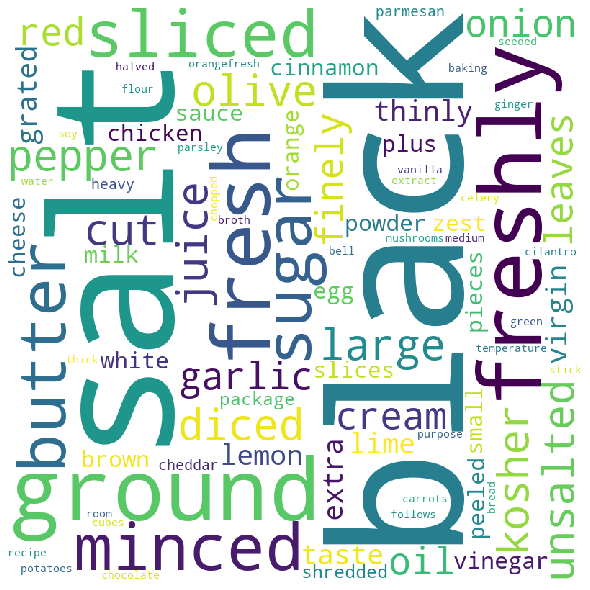

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' ' 
stopwords = stopwords_ingr.append('salt') #not working to remove salt, add to original stopwords?
# iterate through the csv file 
for topic in topics_lsa_tf: 
  
    # split the value 
    tokens = topic.split()  
      
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [141]:
#topic_words = dict(topics[0].split())

In [142]:
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stopwords_ingr,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# #topics = topics_lsa_tf
# topics=topics_lsa_tf[0].split()
# #project4_functions.display_topics(nmf_model, vectorizer.get_feature_names(), 20)
# ##** need the show_topics option in gensim for lda? Example:
# #topics = lda_model.show_topics(formatted=False)
# #alt: just use a list
# #topic_words = dict(topics[i][1])


# fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(key=topics[i].split())##
    
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()